In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import yaml
import sys
import glob
import os
%matplotlib inline

sns.set(font_scale=1.2)
sns.set_style("white")

In [25]:
def sum_cpu(node_res):
    """Return sum of CPU resources allocated to all nodes"""
    cpu = sum([v['cpu'] for v in node_res])
    return cpu

def read_placement(placement, df_data):
    """Read placement dict and write it to df_data. Then return."""
    df_data['num_sources'].append(placement['input']['num_sources'])
    df_data['num_instances'].append(placement['metrics']['num_instances'])
    df_data['max_e2e_delay'].append(placement['metrics']['max_endToEnd_delay'])
    df_data['total_delay'].append(placement['metrics']['total_delay'])
    df_data['runtime'].append(placement['metrics']['runtime'])
    df_data['total_cpu'].append(sum_cpu(placement['placement']['alloc_node_res']))
    return df_data

def read_results(results):
    """Read result files matching the pattern and return df containing their metrics"""
    data = {'num_sources' : [], 'num_instances': [], 'max_e2e_delay': [],
            'total_delay': [], 'runtime': [], 'total_cpu': []}

    # iterate through result files
    for res in glob.glob(results):
        # open and save metrics of interest
        with open(res, 'r') as f:
            placement = yaml.load(f)
            data = read_placement(placement, data)

    return pd.DataFrame(data)

In [26]:
# read results
results = 'placement_data/synth_data/multi_source/'

df_true = read_results(results + 'true/*.yaml')
df_fixed = read_results(results + 'fixed/*.yaml')
df_linear = read_results(results + 'linear/*.yaml')
df_boost = read_results(results + 'boosting/*.yaml')

df_boost

,num_sources,num_instances,max_e2e_delay,total_delay,runtime,total_cpu
0,1,4,30,30,1.831103,0.928927
1,2,8,60,60,1.863014,1.857855
2,3,9,74,64,2.882489,3.898360
3,4,16,120,120,2.753672,3.715710
4,5,14,124,104,6.243465,6.867793


In [38]:
def plot(y_col, y_label):
    fig, ax = plt.subplots()
    
    plt.plot(df_true['num_sources'], df_true[y_col], label='True', color='black', marker='.')
    plt.plot(df_fixed['num_sources'], df_fixed[y_col], label='Fixed', color='green', marker='+')
    plt.plot(df_linear['num_sources'], df_linear[y_col], label='Linear', color='blue', marker='x')
    plt.plot(df_boost['num_sources'], df_boost[y_col], label='Boosting', color='red', marker='^')
    
    plt.xlabel('Num. sources')
    plt.ylabel(y_label)
    plt.xticks(df_true['num_sources'])
    plt.legend()
    
    fig.savefig(f'plots/synth_{y_col}.pdf')

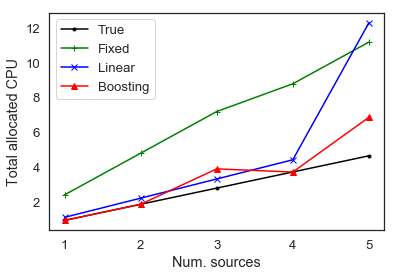

In [39]:
plot('total_cpu', 'Total allocated CPU')

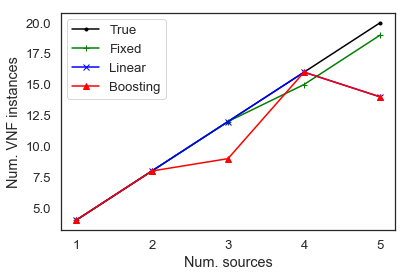

In [40]:
plot('num_instances', 'Num. VNF instances')

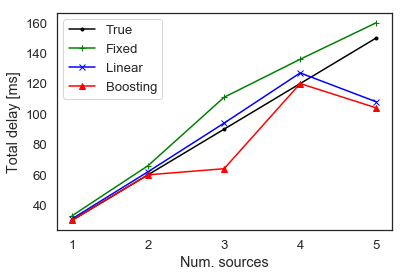

In [41]:
# FIXME: why is total delay lower than max e2e delay?
plot('total_delay', 'Total delay [ms]')

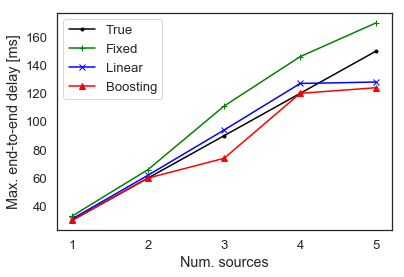

In [42]:
plot('max_e2e_delay', 'Max. end-to-end delay [ms]')